# Q1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from amalearn.reward import *
from amalearn.environment import *
from amalearn.agent import *

In [3]:
a = 7
b = a - 2
c = b - 1
d = 6

In [4]:
means = [a, b, c]
stds = [1, 2, 1]
rewards = [GaussianReward(mean, std) for mean, std in zip(means, stds)]
rewards.append(GaussianUnifromReward(d, 2, -d, 1, 0.7, 0.3))

## 1)

In [5]:
num_runs = 20                 
num_steps = 1000

before count [0. 0. 0. 0.]
before h [0. 0. 0. 0.]
strategy
p vals [0.25 0.25 0.25 0.25]
after count [0. 0. 1. 0.]
after h [0. 0. 0. 0.]
1:	action=2
before count [0. 0. 1. 0.]
before h [0. 0. 0. 0.]
strategy
p vals [0.25 0.25 0.25 0.25]
after count [0. 0. 2. 0.]
after h [-0.01577694 -0.01577694  0.04733082 -0.01577694]
2:	action=2
before count [0. 0. 2. 0.]
before h [-0.01577694 -0.01577694  0.04733082 -0.01577694]
strategy
p vals [0.24599389 0.24599389 0.26201833 0.24599389]
after count [0. 0. 2. 1.]
after h [ 0.13060131  0.13060131  0.20324439 -0.46444702]
3:	action=3
before count [0. 0. 2. 1.]
before h [ 0.13060131  0.13060131  0.20324439 -0.46444702]
strategy
p vals [0.27571888 0.27571888 0.29649338 0.15206886]
after count [0. 1. 2. 1.]
after h [ 0.050212    0.34177461  0.11679801 -0.50878461]
4:	action=1
before count [0. 1. 2. 1.]
before h [ 0.050212    0.34177461  0.11679801 -0.50878461]
random
p vals [0.27571888 0.27571888 0.29649338 0.15206886]
after count [0. 2. 2. 1.]
after h 

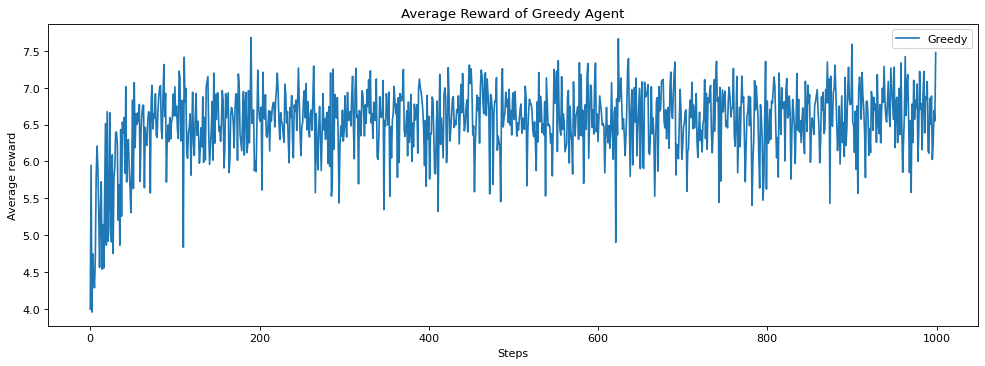

In [8]:
all_rewards = np.zeros((num_runs, num_steps))
epsilon = 0.2
stepsize = 0.1
stepsize_constant = True


for run in range(num_runs):
    np.random.seed(run)
    env = MutliArmedBanditEnvironment(rewards, num_steps, '1')
    agent = EpsilonGradientAgent('1', env, epsilon, stepsize, stepsize_constant)

    for i in range(num_steps):
        obs, r, d, info = agent.take_action()

        all_rewards[run, i] = r

greedy_scores = np.mean(all_rewards, axis=0)
plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
# plt.plot([average_best / num_runs for _ in range(num_steps)], linestyle="--")
plt.plot(greedy_scores)
plt.legend(["Greedy"])
plt.title("Average Reward of Greedy Agent")
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.show()

### a)

### b)